In [32]:
import cv2
import skimage
import numpy
from skimage.io import imread
from skimage.io import imshow
%matplotlib inline

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


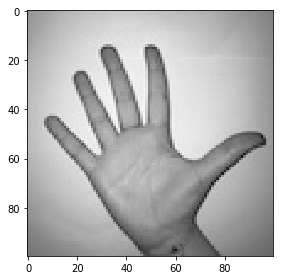

In [52]:
img = cv2.imread('example_5.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow(img)
imshow(img_gray)


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


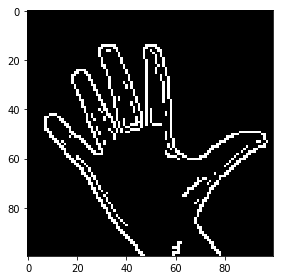

In [53]:
edges = cv2.Canny(img_gray,100,200)
#ret,thresh = cv2.threshold(edges,150,255,cv2.THRESH_BINARY)
imshow(edges)


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


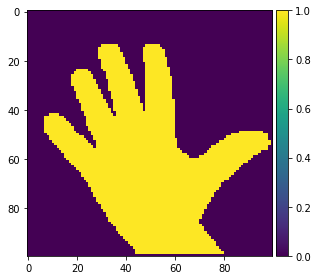

In [54]:
import numpy as np
from scipy.ndimage.morphology import binary_fill_holes
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
binary=np.logical_not((dilation<0.5))
dilation[99,:]=1
filled_I = binary_fill_holes(dilation)
filled_I[99,:]=0
filled_I = filled_I*1
imshow(dilation)
imshow(filled_I)

In [55]:
im2,contours,h= cv2.findContours(filled_I,2,1)
cnt = contours[0]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


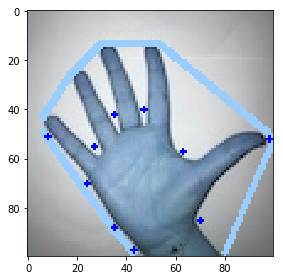

In [56]:
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[153,204,255],2)
    cv2.circle(img,far,1,[0,0,255],-1)
#     print(far)
imshow(img)

[44.598206241955516, 44.553338819890925, 48.46648326421054, 45.27692569068709, 49.8196748283246]
[20.248456731316587, 18.384776310850235, 23.0, 56.85068161420758]


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


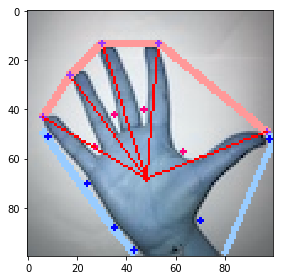

In [62]:
import math


#find center
M = cv2.moments(cnt)
cx = int(M["m10"] / M["m00"])
cy = int(M["m01"] / M["m00"])
center = (cx,cy+10)
cv2.circle(img,center,1,[255,0,0],-1)
# cv2.Line(img,(cx,cy),1,[255,0,0],-1)
count_defects = 0
lena = []
lenfinger = []
maxi = 0
check = 0
prelen=0
#find defect
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    
    # find length of all sides of triangle
    #start to end
    a = math.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
    #start to defect
    b = math.sqrt((far[0] - start[0])**2 + (far[1] - start[1])**2)
    #defect to end
    c = math.sqrt((end[0] - far[0])**2 + (end[1] - far[1])**2)

    # apply cosine rule here
    angle = math.acos((b**2 + c**2 - a**2)/(2*b*c)) * 57
    
    #center to start check 1 
    longlen = math.sqrt((start[0] - cx)**2 + (start[1] - cy)**2)
    if longlen > maxi:
        maxi = longlen
        tip = start
        
    # ignore angles > 90 and highlight rest with red dots
    if angle <= 92:
        count_defects += 1
        cv2.circle(img, far, 1, [255,0,127], -1)
        #dist = cv2.pointPolygonTest(cnt,far,True)
        
        # draw a line from start to end i.e. the convex points (finger tips)
        # (can skip this part)
        
        cv2.line(img,start, end, [255,153,153], 2)
        cv2.circle(img, start, 1, [153,51,255], -1)
        cv2.circle(img, end, 1, [153,51,255], -1)
        lena.append(a)
        longlen1 = math.sqrt((start[0] - cx)**2 + (start[1] - cy)**2)
        longlen2 = math.sqrt((end[0] - cx)**2 + (end[1] - cy)**2)
        if count_defects == 1:
            lenfinger.append(longlen1)
            lenfinger.append(longlen2)
            cv2.line(img,center,start,[255,0,0],1)
            cv2.line(img,center,end,[255,0,0],1)
        else:
            lenfinger.append(longlen2)
            cv2.line(img,center,end,[255,0,0],1)
        
print(lenfinger)   
print(lena)
imshow(img)


555555555


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


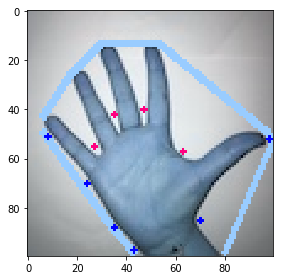

In [59]:
# define actions required
if count_defects == 1:
    print("222222222")
elif count_defects == 2:
    if lena[1]>lena[0]:
        if lena[1] > 45 :
            print("333333333")
        elif lena[1] > 30 :
            print("888888888")
        else:
            print("999999999")
        
    else:
        if lena[0] > 30 :
            print("777777777")
        else:
            print("999999999")    
        
    #separate 3 6 7 8 9
elif count_defects == 3:
    print("444444444")
elif count_defects == 4:
    print("555555555")
else:
    if tip[1]<cy:
        cv2.circle(img, tip, 1, [153,51,255], -1)
        cv2.line(img,center,tip,[255,0,0],1)
        print("11111111")
    else:
        print("00000000")
imshow(img)